In [15]:
%matplotlib inline
import traceback
import os.path
import sys
#sys.path.append(os.path.join(os.path.dirname(os.path.realpath(__file__)), os.pardir))
import re
import random,time
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [25]:
def get_results_from_log(path):
    diction = defaultdict(lambda:defaultdict(float))
    lines = open(path,"r").readlines()
    # diction key: metric->[unseen,seen,mean]->value
    seen_line = lines[-3]
    unseen_line = lines[-2]
    mean_line = lines[-1]
    for metric in ["ROC-AUC","PR-AUC","Top-1 Acc","Top-5 Acc"]:
        if metric == "Top-5 Acc":
            re_metric = re.compile(r'(?<={} = ).*?(?=\n)'.format(metric))
        else:
            re_metric = re.compile(r'(?<={} = ).*?(?=\t)'.format(metric))
        for split in ["seen","unseen","mean"]:
            line = eval("{}_line".format(split))
            value = re_metric.findall(line)[0]
            #print metric, split ,value
            diction[metric][split] = float(value)
    
    return diction
s2010_path = "../../log/fc_Hinge_tmlp_128-50_vmlp_1000-200-50_bird-2010_s.log"
a = get_results_from_log(s2010_path)

In [26]:
s2010_path = "../../log/fc_Hinge_tmlp_128-50_vmlp_1000-200-50_bird-2010_s.log"
s2011_path = "../../log/fc_Hinge_tmlp_128-50_vmlp_1000-200-50_bird-2011_s.log"
w2010_path = "../../log/fc_Eucl_tmlp_4016-300-50_vmlp_1000-200-50_bird-2010_w.log"
w2011_path = "../../log/fc_Eucl_tmlp_4016-300-50_vmlp_1000-200-50_bird-2011_w.log"
ws2010_path = "../../log/fc_Eucl_tmlp_4144-300-50_vmlp_1000-200-50_bird-2010_ws.log"
ws2011_path = "../../log/fc_Eucl_tmlp_4144-300-50_vmlp_1000-200-50_bird-2011_ws.log"
wsa2010_path = "../../log/fc_Eucl_tmlp_4456-300-50_vmlp_1000-200-50_bird-2010_was.log"
wsa2011_path = "../../log/fc_Eucl_tmlp_4456-300-50_vmlp_1000-200-50_bird-2011_was.log"
# all use 496 - 500 line (start from 1)


In [27]:
s = {}
w = {}
ws = {}
wsa = {}
# 2010 dataset
s[2010] = get_results_from_log(s2010_path)
w[2010] = get_results_from_log(w2010_path)
ws[2010] = get_results_from_log(ws2010_path)
wsa[2010] = get_results_from_log(wsa2010_path)

# 2011 dataset 
s[2011] = get_results_from_log(s2011_path)
w[2011] = get_results_from_log(w2011_path)
ws[2011] = get_results_from_log(ws2011_path)
wsa[2011] = get_results_from_log(wsa2011_path)

2010 ROC-AUC plot unit


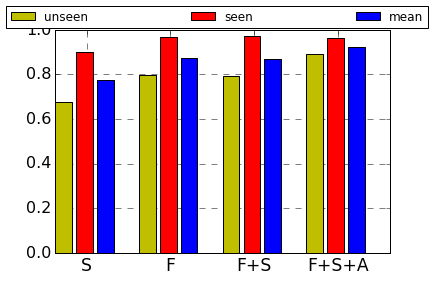

2010 PR-AUC plot unit


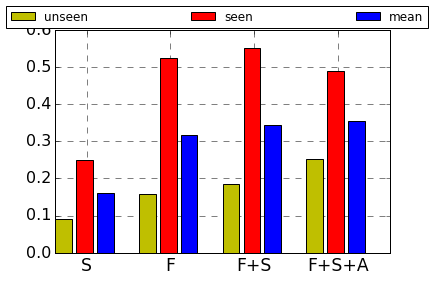

2010 Top-5 Acc plot unit


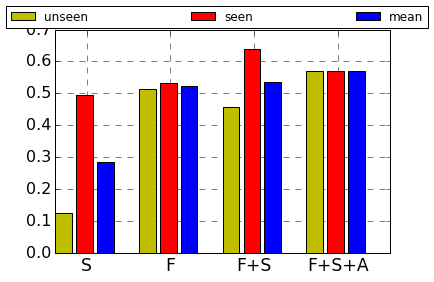

2011 ROC-AUC plot unit


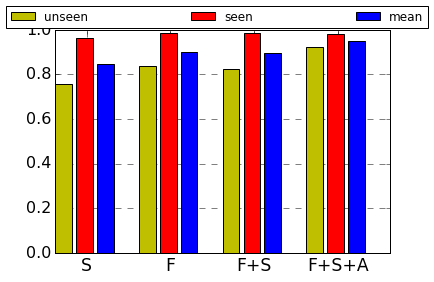

2011 PR-AUC plot unit


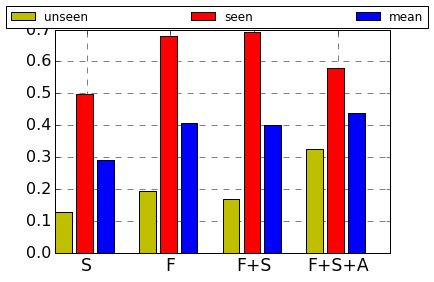

2011 Top-5 Acc plot unit


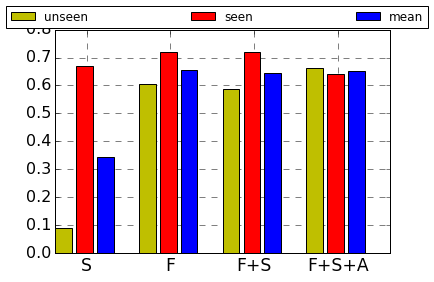

In [119]:
# Plot
import pylab
# 2010 - four figures - by metrics 
# in each figure, s, w, ws, wsa each has 3 set (unseen, seen and mean)
#plt.subplot(2, 3, 1)
for year in [2010,2011]:
    for metric in ["ROC-AUC","PR-AUC","Top-5 Acc"]:
        # plot unit
        print year, metric, "plot unit"
        label_list = ["S","F","F+S","F+S+A"]
        unseen,seen,mean = [],[],[]

        for feat in [s,w,ws,wsa]:
            diction = feat[year][metric]
            for split in ["unseen","seen","mean"]:
                eval(split).append(diction[split])
        # plot 
        n = len(label_list)
        fig, ax = plt.subplots(figsize=(6,4))
        ind = np.arange(n)
        width = 0.20
        
        plot0 = ax.bar(ind - 0.0, unseen, width, color='y', zorder=3)
        plot1 = ax.bar(ind + 0.25, seen, width, color='r', zorder=3)
        plot2 = ax.bar(ind + 0.50, mean, width, color='b', zorder=3)
        #ax.legend( (plot0[0], plot1[0],plot2[0]), ('unseen', 'seen','mean') , fontsize='large') 
        ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
        ax.set_xticks(ind+0.375)
        ax.tick_params(axis="y",labelsize=16)
        #fig.ylabel('Example', fontsize=40)
        lgd = fig.legend((plot0[0], plot1[0],plot2[0]), ('unseen', 'seen','mean') , fontsize='large',mode="expand",ncol=3,loc=2)        
        ax.set_xticklabels(label_list, size='xx-large')
        ax.grid(zorder=0, linestyle='--')
        plt.savefig("./figures/{0}-{1}.pdf".format(year,metric), bbox_extra_artists=(lgd,),bbox_inches='tight',dpi=300)
        #handles,labels = ax.get_legend_handles_labels()
        #axefig,axe = plt.subplots(figsize=(1,1))
        #axefig.legend(handles,labels,loc=1)
        #axefig.savefig("./figures/test.pdf")
        plt.show()



        
    


In [117]:
import pylab
fig = pylab.figure()
figlegend = pylab.figure(figsize=(3,2))
ax = fig.add_subplot(111)
lines = ax.plot(range(10), pylab.randn(10), range(10), pylab.randn(10))
figlegend.legend((plot0[0], plot1[0],plot2[0]), ('unseen', 'seen','mean') , fontsize='large',mode="expand",ncol=3,loc=2) 
fig.show()
figlegend.show()
figlegend.savefig('./figures/legend.pdf')